In [2]:
%pip install xmitgcm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import xmitgcm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from dask.diagnostics import ProgressBar

## Loading the datasets

In [2]:
#Spin Up
data_spinUp = "/gws/nopw/j04/co2clim/uef1/MITgcm/LGM-UF24/TimeVarTair_DiagTracer_SpinUp"
dsSU1 = xmitgcm.open_mdsdataset(data_spinUp, prefix = "dicDiag")
dsSU2 = xmitgcm.open_mdsdataset(data_spinUp, prefix = "Diag4")

In [3]:
#First Four Runs for the 05000 year periodicity
data_FirstFour05000 = "/gws/nopw/j04/co2clim/uef1/MITgcm/LGM-UF24/TimeVarTair_DiagTracer_FirstFourRuns_05000yr"
dsFF050001 = xmitgcm.open_mdsdataset(data_FirstFour05000, prefix = "DiagTracer")
dsFF050002 = xmitgcm.open_mdsdataset(data_FirstFour05000, prefix = "DiagPhys")

In [4]:
#loading the SpinUp files data (the same for all periodicities)
daSUTrach01 = dsSU1['TRAC01'].weighted(dsSU1['rA']*dsSU1['hFacC']).mean(['Z', 'XC', 'YC'])
daSUDIC = dsSU1['DICCARB'].weighted(dsSU1['rA']*dsSU1['hFacC']).mean(['Z', 'XC', 'YC'])
daSUAverageDIC = dsSU1['TRAC01'].isel(Z = 0).weighted(dsSU1['rA']).mean(['XC', 'YC'])
daSUTemp = dsSU2['THETA'].weighted(dsSU2['rA']*dsSU2['hFacC']).mean(['Z', 'XC', 'YC'])
daSUAverageTemp = dsSU2['THETA'].isel(Z = 0).weighted(dsSU1['rA']).mean(['XC', 'YC'])
with ProgressBar(): 
    daSUTrach01 = daSUTrach01.load()
with ProgressBar(): 
    daSUDIC = daSUDIC.load()
with ProgressBar(): 
    daSUAverageDIC = daSUAverageDIC.load()
with ProgressBar(): 
    daSUTemp = daSUTemp.load()
with ProgressBar(): 
    daSUAverageTemp = daSUAverageTemp.load()

[########################################] | 100% Completed | 614.28 ms
[########################################] | 100% Completed | 531.72 ms
[########################################] | 100% Completed | 207.89 ms
[########################################] | 100% Completed | 309.93 ms
[########################################] | 100% Completed | 207.02 ms


# 05000 year periodicity

### Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration

In [5]:
daFF05000Trach01 = dsFF050001['TRAC01'].weighted(dsFF050001['rA']*dsFF050001['hFacC']).mean(['Z', 'XC', 'YC'])
with ProgressBar(): 
    daFF05000Trach01 = daFF05000Trach01.load()

[########################################] | 100% Completed | 523.26 ms


Text(0.5, 1.0, 'Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration')

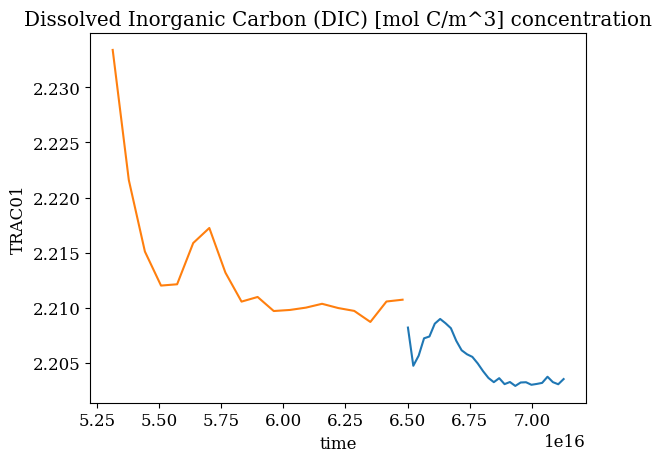

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF05000Trach01.plot()
daSUTrach01.plot()
plt.title("Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration")

### Surface Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration¶

In [7]:
daFF05000AverageDIC = dsFF050001['TRAC01'].isel(Z = 0).weighted(dsFF050002['rA']).mean(['XC', 'YC'])
with ProgressBar(): 
    daFF05000AverageDIC = daFF05000AverageDIC.load()

[########################################] | 100% Completed | 418.64 ms


Text(0.5, 1.0, 'Average Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration')

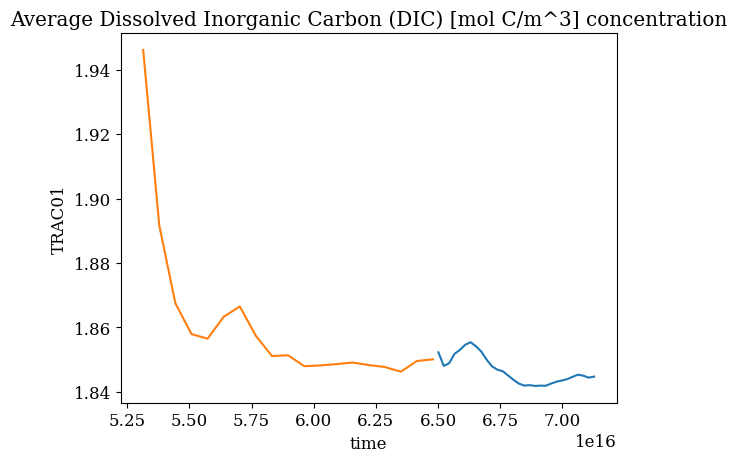

In [8]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF05000AverageDIC.plot()
daSUAverageDIC.plot()
plt.title("Surface Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration")

### Carbonate chg-biol prod and remin (mol eq/m3/s)

In [9]:
daFF05000DIC = dsFF050001['DICCARB'].weighted(dsFF050001['rA']*dsFF050001['hFacC']).mean(['Z', 'XC', 'YC'])
with ProgressBar(): 
    daFF05000DIC = daFF05000DIC.load()

[########################################] | 100% Completed | 421.81 ms


Text(0.5, 1.0, 'Carbonate chg-biol prod and remin (mol eq/m3/s)')

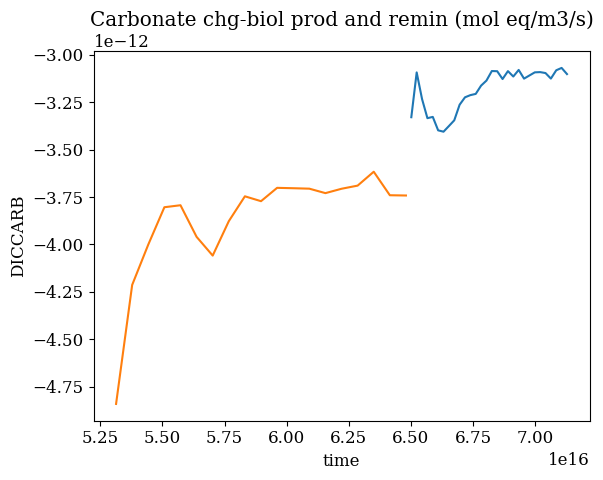

In [10]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF05000DIC.plot()
daSUDIC.plot()
plt.title("Carbonate chg-biol prod and remin (mol eq/m3/s)")

### Potential Temperature [degC]

In [11]:
daFF05000Temp = dsFF050002['THETA'].weighted(dsFF050002['rA']*dsFF050002['hFacC']).mean(['Z', 'XC', 'YC'])
with ProgressBar(): 
    daFF05000Temp = daFF05000Temp.load()

[########################################] | 100% Completed | 1.23 sms


Text(0.5, 1.0, 'Potential Temperature [degC]')

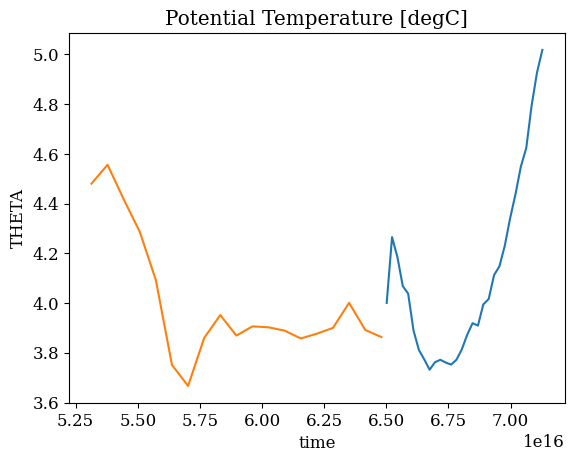

In [12]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF05000Temp.plot()
daSUTemp.plot()
plt.title("Potential Temperature [degC]")

### Surface Potential Temperature [degC]

In [17]:
daFF05000AverageTemp = dsFF050002['THETA'].isel(Z = 0).weighted(dsFF050002['rA']).mean(['XC', 'YC'])
with ProgressBar(): 
    daFF05000AverageTemp = daFF05000AverageTemp.load()

[########################################] | 100% Completed | 828.14 ms


Text(0.5, 1.0, 'Average Potential Temperature [degC]')

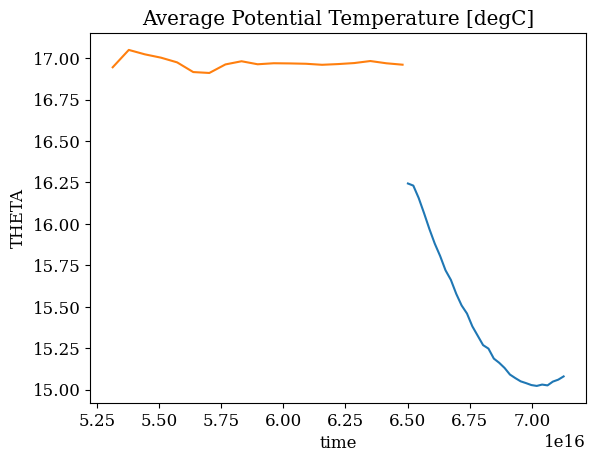

In [18]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF05000AverageTemp.plot()
daSUAverageTemp.plot()
plt.title("Surface Potential Temperature [degC]")